## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, KBinsDiscretizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando as bases

In [ ]:
# Importando os arquivos (lembrar de copiar o caminho dos arquivos do computador de quem estiver trabalhando no código)

base19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MODELAGEM E PREPARAÇÃO DE DADOS/IT Salary Survey EU 2019.csv')
base20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MODELAGEM E PREPARAÇÃO DE DADOS/IT Salary Survey EU  2020.csv')

In [ ]:
# Shape original das bases

print(f'Shape base19: {base19.shape}\nShape base20: {base20.shape}')

Shape base19: (991, 23)
Shape base20: (1253, 23)


## Expurgando linhas de anos diferentes das bases

In [ ]:
base19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

In [ ]:
base19.columns.tolist()

['Zeitstempel',
 'Age',
 'Gender',
 'City',
 'Seniority level',
 'Position (without seniority)',
 'Years of experience',
 'Your main technology / programming language',
 'Yearly brutto salary (without bonus and stocks)',
 'Yearly bonus',
 'Yearly stocks',
 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
 'Yearly bonus one year ago. Only answer if staying in same country',
 'Yearly stocks one year ago. Only answer if staying in same country',
 'Number of vacation days',
 'Number of home office days per month',
 'Main language at work',
 'Company name ',
 'Company size',
 'Company type',
 'Сontract duration',
 'Company business sector',
 '0']

In [ ]:
base20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
base20.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'City',
 'Position ',
 'Total years of experience',
 'Years of experience in Germany',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Yearly brutto salary (without bonus and stocks) in EUR',
 'Yearly bonus + stocks in EUR',
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
 'Annual bonus+stocks one year ago. Only answer if staying in same country',
 'Number of vacation days',
 'Employment status',
 'Сontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [ ]:
# Excluindo as linhas da base onde o ano da data é diferente do ano da pesquisa para a base de 2019.

AnoPesquisa19 = 2019
AnoDf19 = pd.to_datetime(base19['Zeitstempel']).dt.year
base19 = base19.drop(base19[AnoDf19 != AnoPesquisa19].index)

In [ ]:
# Excluindo as linhas da base onde o ano da data é diferente do ano da pesquisa para a base de 2020.

AnoPesquisa20 = 2020
AnoDf20 = pd.to_datetime(base20['Timestamp']).dt.year
base20 = base20.drop(base20[AnoDf20 != AnoPesquisa20].index)

In [ ]:
# Shape das bases após tratar as datas diferentes.

print(f'Shape base19: {base19.shape}\nShape base20: {base20.shape}')

Shape base19: (971, 23)
Shape base20: (1216, 23)


## Consolidando os Dataframes em uma única base

In [ ]:
# Renomeando colunas do Dataframe base19

base19.rename(columns=
{'Zeitstempel':'Timestamp',
 'Position (without seniority)':'Position',
 'Yearly brutto salary (without bonus and stocks)': 'Current Salary',
}, inplace=True)

In [ ]:
# Renomeando colunas do Dataframe base20

base20.rename(columns={
  'Position ':'Position',
  'Years of experience in Germany':'Years of experience',
  'Yearly brutto salary (without bonus and stocks) in EUR':'Current Salary'
}, inplace=True)

In [ ]:
# Realizando a interseção das bases com as linhas excluídas

commom_coll = base19.columns.intersection(base20.columns).tolist()
full_Data = pd.concat([base19[commom_coll], base20[commom_coll]])

print(f'O Shape do novo Dataframe, consolidado a partir das bases 19 e 20 é:\n\n{full_Data.shape}')

O Shape do novo Dataframe, consolidado a partir das bases 19 e 20 é:

(2187, 14)


In [ ]:
full_Data.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'City',
 'Seniority level',
 'Position',
 'Years of experience',
 'Your main technology / programming language',
 'Current Salary',
 'Number of vacation days',
 'Main language at work',
 'Company size',
 'Company type',
 'Сontract duration']

In [ ]:
# Renomeando colunas do Dataframe full_Data para coincidir com os nomes declarados pelo professor no exercício

full_Data.rename(columns={
  'Seniority level':'Seniority',
  'Main language at work':'Language',
  'Years of experience':'Experience',
  'Number of vacation days':'Vacation'
}, inplace=True)

full_Data = full_Data.drop('Your main technology / programming language', axis = 1)

In [ ]:
full_Data.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'City',
 'Seniority',
 'Position',
 'Experience',
 'Current Salary',
 'Vacation',
 'Language',
 'Company size',
 'Company type',
 'Сontract duration']

In [ ]:
full_Data.head()

,Timestamp,Age,Gender,City,Seniority,Position,Experience,Current Salary,Vacation,Language,Company size,Company type,Сontract duration
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,64000.0,29.0,English,50-100,Startup,unlimited
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,55000.0,22.0,English,10-50,Product,unlimited
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,70000.0,27.0,English,1000+,Startup,unlimited
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,63000.0,24.0,English,100-1000,Product,unlimited
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,66000.0,30.0,English,50-100,Product,unlimited


## Tratamento dos valores nulos do novo DataFrame

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 134 valores nulos.

A coluna Gender possui 9 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 24 valores nulos.

A coluna Position possui 6 valores nulos.

A coluna Experience possui 29 valores nulos.

A coluna Current Salary possui 1 valores nulos.

A coluna Vacation possui 124 valores nulos.

A coluna Language possui 20 valores nulos.

A coluna Company size possui 30 valores nulos.

A coluna Company type possui 54 valores nulos.

A coluna Сontract duration possui 54 valores nulos.



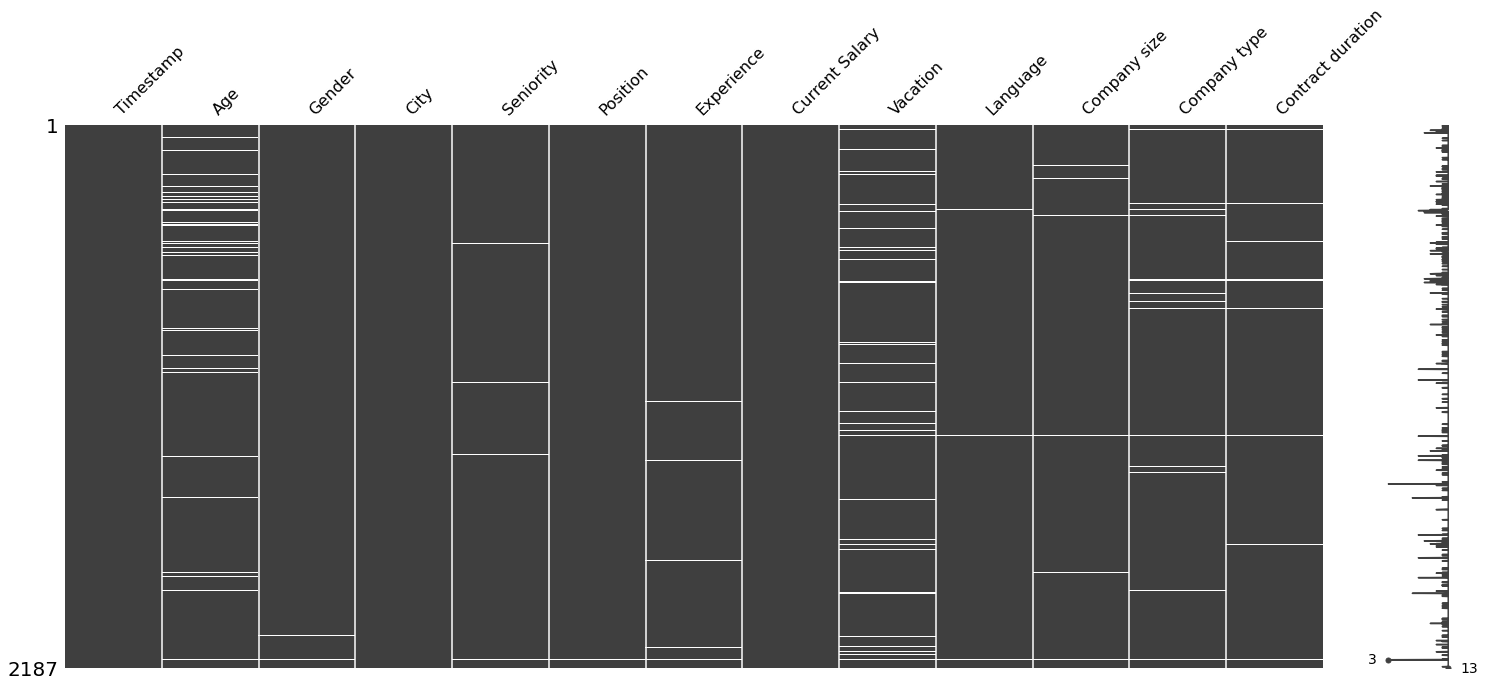

In [ ]:
msno.matrix(full_Data);

In [ ]:
full_Data.isna().sum().sort_values()

Timestamp              0
City                   0
Current Salary         1
Position               6
Gender                 9
Language              20
Seniority             24
Experience            29
Company size          30
Company type          54
Сontract duration     54
Vacation             124
Age                  134
dtype: int64

### Tratando os valores nulos da coluna Current Salary:

In [ ]:
# Como a coluna Current Salary possui apenas um valor nulo, esta linha será excluída do DataFrame full_Data
full_Data = full_Data[~full_Data['Current Salary'].isnull()]

### Tratando os valores nulos da coluna Age:

In [ ]:
full_Data['Age'].describe()

count    2053.000000
mean       32.462737
std         5.486578
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

Como é possível observar abaixo, mesmo separando em gênero a média é próxima de 32 anos, desta forma, decidimos substituir os valores nulos pela média, que é 32 anos. 


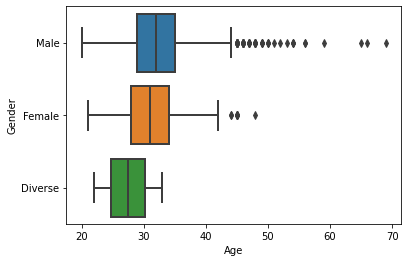

In [ ]:
print('Como é possível observar abaixo, mesmo separando em gênero a média é próxima de 32 anos, desta forma, decidimos substituir os valores nulos pela média, que é 32 anos. ')

sns.boxplot( x=full_Data["Age"],y=full_Data["Gender"], width=.8, fliersize=5,linewidth=2);
plt.show()

In [ ]:
# Idades para gêneros desconhecidos antes de tratadas. De 11 registros, seis eram nulos, por isso essa categoria será a que terá o maior impacto.
full_Data[full_Data.Gender=='Other'].head(15)

,Timestamp,Age,Gender,City,Seniority,Position,Experience,Current Salary,Vacation,Language,Company size,Company type,Сontract duration


In [ ]:
full_Data['Age'] = full_Data['Age'].fillna(32)
full_Data['Age'] = full_Data['Age'].astype(int)

Como sinalizado anteriormente, o gênero "Other" foi o que teve maior impacto com a substituição dos valores nulos pela média de idade, uma vez que a maioria dos seus registros eram nulos.



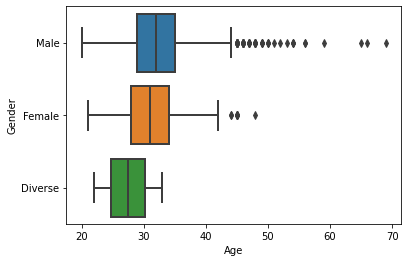

In [ ]:
print('Como sinalizado anteriormente, o gênero "Other" foi o que teve maior impacto com a substituição dos valores nulos pela média de idade, uma vez que a maioria dos seus registros eram nulos.\n')
sns.boxplot( x=full_Data["Age"],y=full_Data["Gender"], width=.8, fliersize=5,linewidth=2);
plt.show()

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 9 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 24 valores nulos.

A coluna Position possui 6 valores nulos.

A coluna Experience possui 29 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 123 valores nulos.

A coluna Language possui 20 valores nulos.

A coluna Company size possui 30 valores nulos.

A coluna Company type possui 54 valores nulos.

A coluna Сontract duration possui 54 valores nulos.



### Tratando os valores nulos da coluna Gender:

In [ ]:
full_Data['Gender'].value_counts(dropna=False)

Male       1836
Female      339
NaN           9
Diverse       2
Name: Gender, dtype: int64

In [ ]:
# Como a quantidade de valores nulos é muito pequena comparando ao total da base e por já existirem outros dois registros como "Diverse", os valores nulos e "Diverse" fora registrados como "Other"

In [ ]:
full_Data['Gender'] = full_Data['Gender'].fillna('Other')
full_Data['Gender'] = full_Data['Gender'].replace('Diverse', 'Other')

In [ ]:
full_Data['Gender'].value_counts(dropna=False)

Male      1836
Female     339
Other       11
Name: Gender, dtype: int64

### Tratando os valores nulos da coluna Seniority:

In [ ]:
# Primeiro vamos diminuir o número de categorias de senioridade

full_Data['Seniority'] = full_Data['Seniority'].replace(to_replace= ['student','Entry level','Working Student','intern','Student','Intern','C-Level'],value='Junior')
full_Data['Seniority'] = full_Data['Seniority'].replace(to_replace= ['No level ','no idea, there are no ranges in the firm '],value='No level')
full_Data['Seniority'] = full_Data['Seniority'].replace(to_replace= ['Principal','Director','VP','CTO','Key'],value='Head')
full_Data['Seniority'] = full_Data['Seniority'].replace(to_replace= ['Manager','Work Center Manager','C-level executive manager'],value='Lead')
full_Data['Seniority'].value_counts()

Senior      1129
Middle       622
Lead         196
Junior       155
Head          57
No level       3
Name: Seniority, dtype: int64

In [ ]:
# Apenas 1% dos registros de senioridade são nulos enquanto mais de 50% são de nível Senior. Sendo assim, iremos considerar que os valores nulos são na verdade de nível Senior.
full_Data['Seniority'].value_counts(dropna = False, normalize = True)

Senior      0.516468
Middle      0.284538
Lead        0.089661
Junior      0.070906
Head        0.026075
NaN         0.010979
No level    0.001372
Name: Seniority, dtype: float64

In [ ]:
full_Data['Seniority'] = full_Data['Seniority'].fillna('Senior')

In [ ]:
# Como é possível comparar, o tratamento dos dados nulos escolhido não representou diferença significativa na base, uma vez que a porcentagem de registros do nível Senior apenas 1%.

full_Data['Seniority'].value_counts(dropna = False, normalize = True)

Senior      0.527447
Middle      0.284538
Lead        0.089661
Junior      0.070906
Head        0.026075
No level    0.001372
Name: Seniority, dtype: float64

In [ ]:
full_Data['Seniority'].value_counts(dropna = False)

Senior      1153
Middle       622
Lead         196
Junior       155
Head          57
No level       3
Name: Seniority, dtype: int64

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 6 valores nulos.

A coluna Experience possui 29 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 123 valores nulos.

A coluna Language possui 20 valores nulos.

A coluna Company size possui 30 valores nulos.

A coluna Company type possui 54 valores nulos.

A coluna Сontract duration possui 54 valores nulos.



### Tratando os valores nulos da coluna Position:

In [ ]:
# Como a coluna Position possui apenas 6 valores nulos, estas linhas serão excluídas do DataFrame full_Data
full_Data = full_Data[~full_Data['Position'].isnull()]

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 26 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 119 valores nulos.

A coluna Language possui 17 valores nulos.

A coluna Company size possui 27 valores nulos.

A coluna Company type possui 51 valores nulos.

A coluna Сontract duration possui 51 valores nulos.



### Tratando os valores nulos da coluna Experience:

In [ ]:
full_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 1215
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          2180 non-null   object 
 1   Age                2180 non-null   int64  
 2   Gender             2180 non-null   object 
 3   City               2180 non-null   object 
 4   Seniority          2180 non-null   object 
 5   Position           2180 non-null   object 
 6   Experience         2154 non-null   object 
 7   Current Salary     2180 non-null   float64
 8   Vacation           2061 non-null   object 
 9   Language           2163 non-null   object 
 10  Company size       2153 non-null   object 
 11  Company type       2129 non-null   object 
 12  Сontract duration  2129 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 238.4+ KB


In [ ]:
full_Data['Experience'].describe()

count     2154
unique      79
top          2
freq       189
Name: Experience, dtype: object

In [ ]:
full_Data.Experience.isnull().sum()

26

In [ ]:
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['< 1'],value= 0)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['<1'],value= 0)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['1,7'],value= 2)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.1'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.8'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.9'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['4,5'],value= 5)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['4.5'],value= 5)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.4'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['less than year'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.2'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['4 (in Switzerland), 0 (in Germany)'],value= 4)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['6 (not as a data scientist, but as a lab scientist)'],value= 6)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['4 month'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['1,5'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['1.5'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['3,5'],value= 3)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['3.5'],value= 3)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['2.6'],value= 3)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['2,5'],value= 2)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['2.5'],value= 2)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0,5'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.25'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0.5'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['3 months'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['3 (in Poland)'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['⁰'],value= 0)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['0,3'],value= 1)
full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['-'],value= 1)
full_Data = full_Data[~full_Data['Experience'].isnull()]
full_Data['Experience'] = full_Data['Experience'].astype(int)
full_Data['Experience'].value_counts()

<ipython-input-352-2c4793286c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['< 1'],value= 0)
<ipython-input-352-2c4793286c97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_Data['Experience'] = full_Data['Experience'].replace(to_replace= ['<1'],value= 0)
<ipython-input-352-2c4793286c97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

1     286
2     257
3     232
5     211
4     174
6     140
10    135
7     108
0     107
8     101
9      71
12     65
15     58
11     53
13     33
20     25
14     25
16     24
18     15
17      9
19      7
25      7
22      4
30      3
28      2
24      1
26      1
Name: Experience, dtype: int64

In [ ]:
full_Data.Experience.isnull().sum()

0

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 0 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 115 valores nulos.

A coluna Language possui 15 valores nulos.

A coluna Company size possui 24 valores nulos.

A coluna Company type possui 48 valores nulos.

A coluna Сontract duration possui 49 valores nulos.



### Tratando os valores nulos da coluna Vacation:

In [ ]:
full_Data['Vacation'].describe()

count     2039
unique      77
top         30
freq       466
Name: Vacation, dtype: object

In [ ]:
full_Data['Vacation'].value_counts(dropna=False)

30           466
30.0         333
28           226
28.0         161
25.0         120
            ... 
4.0            1
60.0           1
38.0           1
(no idea)      1
10             1
Name: Vacation, Length: 78, dtype: int64

In [ ]:
# Como o padrão de dias de férias é de 30 dias, foram substituídos os valores estranhos da base de dados por 30 dias.

full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['Unlimited ','Unlimited','unlimited ','unlimited','365','30 in contract (but theoretically unlimited)','(no idea)'],value= 30)
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['37.5'],value= 38)
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['~25'],value= 25)
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['24 labour days'],value= 23)
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['23+'],value= 23)
full_Data['Vacation'] = full_Data['Vacation'].fillna(30)
full_Data['Vacation'] = full_Data['Vacation'].astype(int)
full_Data['Vacation'].value_counts()

<ipython-input-357-d18bc757c956>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['Unlimited ','Unlimited','unlimited ','unlimited','365','30 in contract (but theoretically unlimited)','(no idea)'],value= 30)
<ipython-input-357-d18bc757c956>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['37.5'],value= 38)
<ipython-input-357-d18bc757c956>:5: SettingWithCopyWarning: 
A value

30     924
28     388
25     206
27     163
26     127
24     119
29      48
20      37
32      18
31      16
22      14
21      14
35      10
23       9
40       8
33       6
36       6
45       6
15       4
14       4
38       3
37       3
0        3
12       2
60       2
5        2
34       1
39       1
1        1
99       1
50       1
75       1
3        1
16       1
9        1
100      1
4        1
10       1
Name: Vacation, dtype: int64

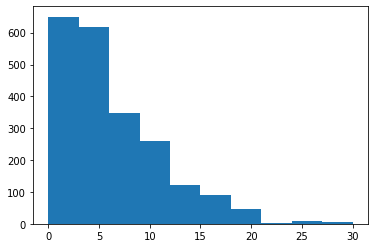

In [ ]:
plt.hist(full_Data['Experience']);

In [ ]:
full_Data.Vacation.isnull().sum()

0

In [ ]:
full_Data['Experience'].describe()

count    2154.000000
mean        5.826834
std         4.897387
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        30.000000
Name: Experience, dtype: float64

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 0 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 0 valores nulos.

A coluna Language possui 15 valores nulos.

A coluna Company size possui 24 valores nulos.

A coluna Company type possui 48 valores nulos.

A coluna Сontract duration possui 49 valores nulos.



### Tratando os valores nulos da coluna Language:

In [ ]:
full_Data['Language'].describe()

count        2139
unique         19
top       English
freq         1709
Name: Language, dtype: object

In [ ]:
full_Data['Language'].value_counts(dropna=False)

English               1709
Deutsch                180
German                 176
Russian                 43
NaN                     15
French                   6
Italian                  5
Spanish                  4
Polish                   3
English and German       2
Русский                  2
Polish+English           1
Dutch                    1
Ukrainian                1
English+Deutsch          1
50/50                    1
Czech                    1
Deuglisch                1
both                     1
Russian, English         1
Name: Language, dtype: int64

In [ ]:
# Como a coluna Language possui apenas 17 valores nulos, estas linhas serão excluídas do DataFrame full_Data
full_Data = full_Data[~full_Data['Language'].isnull()]

In [ ]:
full_Data['Language'].value_counts(dropna=False)

English               1709
Deutsch                180
German                 176
Russian                 43
French                   6
Italian                  5
Spanish                  4
Polish                   3
English and German       2
Русский                  2
Polish+English           1
Dutch                    1
Ukrainian                1
English+Deutsch          1
50/50                    1
Czech                    1
Deuglisch                1
both                     1
Russian, English         1
Name: Language, dtype: int64

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 0 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 0 valores nulos.

A coluna Language possui 0 valores nulos.

A coluna Company size possui 16 valores nulos.

A coluna Company type possui 40 valores nulos.

A coluna Сontract duration possui 38 valores nulos.



### Tratando os valores nulos da coluna Company size:

In [ ]:
full_Data['Company size'].describe()

count      2123
unique        8
top       1000+
freq        751
Name: Company size, dtype: object

In [ ]:
full_Data['Company size'].value_counts(dropna=False)

1000+       751
101-1000    387
100-1000    361
11-50       164
51-100      139
50-100      130
10-50       105
up to 10     86
NaN          16
Name: Company size, dtype: int64

In [ ]:
# Como a coluna Company size possui apenas 17 valores nulos, estas linhas serão excluídas do DataFrame full_Data
full_Data = full_Data[~full_Data['Company size'].isnull()]

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 0 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 0 valores nulos.

A coluna Language possui 0 valores nulos.

A coluna Company size possui 0 valores nulos.

A coluna Company type possui 33 valores nulos.

A coluna Сontract duration possui 34 valores nulos.



### Tratando os valores nulos da coluna Company type:

In [ ]:
full_Data['Company type'].describe()

count        2090
unique         62
top       Product
freq         1318
Name: Company type, dtype: object

In [ ]:
full_Data['Company type'].value_counts(dropna=False)

Product                 1318
Startup                  413
Consulting / Agency      249
NaN                       33
Bodyshop / Outsource      30
                        ... 
e-commerce                 1
SaaS                       1
Energy                     1
Enterprise                 1
Outsourse                  1
Name: Company type, Length: 63, dtype: int64

In [ ]:
full_Data['Company type'] = full_Data['Company type'].fillna('Product')

In [ ]:
full_Data['Company type'].value_counts(dropna=False)

Product                 1351
Startup                  413
Consulting / Agency      249
Bodyshop / Outsource      30
University                 8
                        ... 
e-commerce                 1
SaaS                       1
Publisher                  1
Enterprise                 1
Outsourse                  1
Name: Company type, Length: 62, dtype: int64

In [ ]:
full_Data['Company type'].isnull().sum()

0

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 0 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 0 valores nulos.

A coluna Language possui 0 valores nulos.

A coluna Company size possui 0 valores nulos.

A coluna Company type possui 0 valores nulos.

A coluna Сontract duration possui 34 valores nulos.



### Tratando os valores nulos da coluna Сontract duration:

In [ ]:
full_Data['Сontract duration'].describe()

count                   2089
unique                     9
top       Unlimited contract
freq                    1099
Name: Сontract duration, dtype: object

In [ ]:
full_Data['Сontract duration'].value_counts(dropna=False)

Unlimited contract    1099
unlimited              827
Temporary contract      58
more than 1 year        55
1 year                  38
NaN                     34
6 months                 6
3 months                 4
less than 3 months       1
0                        1
Name: Сontract duration, dtype: int64

In [ ]:
full_Data['Сontract duration'] = full_Data['Сontract duration'].replace(to_replace= ['6 months','3 months','less than 3 months','0'],value= '1 year')
full_Data['Сontract duration'] = full_Data['Сontract duration'].replace(to_replace= ['unlimited'],value= 'Unlimited contract')
full_Data['Сontract duration'] = full_Data['Сontract duration'].fillna('Unlimited contract')
full_Data['Сontract duration'].value_counts()

Unlimited contract    1960
Temporary contract      58
more than 1 year        55
1 year                  50
Name: Сontract duration, dtype: int64

In [ ]:
# Identificando o total de valores nulos por coluna.

for i in range(13):
  print(f'A coluna {full_Data.columns.values[i]} possui {full_Data[full_Data.columns[i]].isnull().sum()} valores nulos.\n')

A coluna Timestamp possui 0 valores nulos.

A coluna Age possui 0 valores nulos.

A coluna Gender possui 0 valores nulos.

A coluna City possui 0 valores nulos.

A coluna Seniority possui 0 valores nulos.

A coluna Position possui 0 valores nulos.

A coluna Experience possui 0 valores nulos.

A coluna Current Salary possui 0 valores nulos.

A coluna Vacation possui 0 valores nulos.

A coluna Language possui 0 valores nulos.

A coluna Company size possui 0 valores nulos.

A coluna Company type possui 0 valores nulos.

A coluna Сontract duration possui 0 valores nulos.



## Realizar encoding das seguintes variáveis categóricas, de acordo com a característica do atributo: seniority, gender e city

### Encoding Gender

In [ ]:
full_Data['Gender'].value_counts()

Male      1783
Female     333
Other        7
Name: Gender, dtype: int64

In [ ]:
x = full_Data['Gender']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit(np.array(x).reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [ ]:
enc.get_feature_names_out(['Gender'])

array(['Gender_Female', 'Gender_Male', 'Gender_Other'], dtype=object)

In [ ]:
pd.DataFrame(enc.transform(np.array(full_Data['Gender']).reshape(-1,1)).toarray(),
             columns=enc.get_feature_names_out(['Gender'])).astype(int)

,Gender_Female,Gender_Male,Gender_Other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
2118,0,1,0
2119,1,0,0
2120,0,1,0
2121,0,1,0


### Encoding City

In [ ]:
full_Data['City'].value_counts()

Berlin       1071
Munich        447
Frankfurt      89
Amsterdam      80
Hamburg        69
             ... 
Lausanne        1
Bremen          1
Würzburg        1
Antwerpen       1
Sevilla         1
Name: City, Length: 142, dtype: int64

In [ ]:
x = full_Data['City']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit(np.array(x).reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.categories_

[array(['Aachen', 'Almere', 'Amsterdam', 'Ansbach', 'Antwerpen',
        'Barcelona', 'Bayern', 'Berlin', 'Bern', 'Bielefeld', 'Bodensee',
        'Boeblingen', 'Bonn', 'Braunschweig', 'Braunschweig ', 'Bremen',
        'Brunswick', 'Brussels', 'Bölingen', 'Cambridge', 'City in Russia',
        'Cologne', 'Copenhagen', 'Cork', 'Cracow', 'Cupertino',
        'Darmstadt', 'Den Haag', 'Dortmund', 'Dresden', 'Dubai', 'Dublin',
        'Dublin ', 'Duesseldorf', 'Dusseldorf', 'Dusseldurf', 'Düsseldorf',
        'Düsseldorf ', 'Eindhoven', 'Eindhoven ', 'Erlangen', 'Fr',
        'France', 'Frankfurt', 'Freiburg', 'Friedrichshafen', 'Gdańsk',
        'Gothenburg', 'Hamburg', 'Hannover', 'Heidelberg', 'Heidelberg ',
        'Heilbronn', 'Helsinki', 'Hildesheim', 'Hildesheim ', 'Hilversum',
        'Ingolstadt', 'Innsbruck', 'Istanbul', 'Jena', 'Jyvaskyla',
        'Kaiserslautern', 'Karlsruhe', 'Karlsruhe ', 'Kassel ', 'Kempten',
        'Kiev', 'Koblenz', 'Konstanz', 'Konstanz area', 'Krakow',

In [ ]:
enc.get_feature_names_out(['City'])

array(['City_Aachen', 'City_Almere', 'City_Amsterdam', 'City_Ansbach',
       'City_Antwerpen', 'City_Barcelona', 'City_Bayern', 'City_Berlin',
       'City_Bern', 'City_Bielefeld', 'City_Bodensee', 'City_Boeblingen',
       'City_Bonn', 'City_Braunschweig', 'City_Braunschweig ',
       'City_Bremen', 'City_Brunswick', 'City_Brussels', 'City_Bölingen',
       'City_Cambridge', 'City_City in Russia', 'City_Cologne',
       'City_Copenhagen', 'City_Cork', 'City_Cracow', 'City_Cupertino',
       'City_Darmstadt', 'City_Den Haag', 'City_Dortmund', 'City_Dresden',
       'City_Dubai', 'City_Dublin', 'City_Dublin ', 'City_Duesseldorf',
       'City_Dusseldorf', 'City_Dusseldurf', 'City_Düsseldorf',
       'City_Düsseldorf ', 'City_Eindhoven', 'City_Eindhoven ',
       'City_Erlangen', 'City_Fr', 'City_France', 'City_Frankfurt',
       'City_Freiburg', 'City_Friedrichshafen', 'City_Gdańsk',
       'City_Gothenburg', 'City_Hamburg', 'City_Hannover',
       'City_Heidelberg', 'City_Heidelberg '

In [ ]:
pd.DataFrame(enc.transform(np.array(full_Data['City']).reshape(-1,1)).toarray(),
             columns=enc.get_feature_names_out(['City'])).astype(int)


,City_Aachen,City_Almere,City_Amsterdam,City_Ansbach,City_Antwerpen,City_Barcelona,City_Bayern,City_Berlin,City_Bern,City_Bielefeld,...,City_Warsaw,"City_Warsaw, Poland",City_Wolfsburg,City_Wroclaw,City_Würzburg,City_Würzburg,City_Zug,City_Zurich,City_Zürich,City_warsaw
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2121,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Encoding Seniority

In [ ]:
full_Data['Seniority'].value_counts()

Senior      1116
Middle       610
Lead         190
Junior       149
Head          55
No level       3
Name: Seniority, dtype: int64

In [ ]:
x = full_Data['Seniority']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit(np.array(x).reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.categories_

[array(['Head', 'Junior', 'Lead', 'Middle', 'No level', 'Senior'],
       dtype=object)]

In [ ]:
enc.get_feature_names_out(['Seniority'])

array(['Seniority_Head', 'Seniority_Junior', 'Seniority_Lead',
       'Seniority_Middle', 'Seniority_No level', 'Seniority_Senior'],
      dtype=object)

In [ ]:
pd.DataFrame(enc.transform(np.array(full_Data['Seniority']).reshape(-1,1)).toarray(),
             columns=enc.get_feature_names_out(['Seniority'])).astype(int)


,Seniority_Head,Seniority_Junior,Seniority_Lead,Seniority_Middle,Seniority_No level,Seniority_Senior
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2118,0,0,0,1,0,0
2119,0,0,1,0,0,0
2120,0,0,0,0,0,1
2121,0,0,0,0,0,1


## Realizar rescaling das seguintes variáveis categóricas, utilizando pelo menos 3 métodos de reescalagem de dados para cada uma e visualize os dados antes e após o tratamento: age, salary, vacation e experience

### Rescaling Age

#### Normalization

In [ ]:
X = full_Data['Age'].fillna(full_Data['Age'].median())
X = np.array(X).reshape((-1,1))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
Y = np.array(full_Data['Age'].fillna(full_Data['Age'].median())).reshape(-1,1)

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Age'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Age'])

In [ ]:
Y_origin.describe()

,Age
count,2123.000000
mean,32.474329
std,5.334051
min,20.000000
25%,29.000000
50%,32.000000
75%,35.000000
max,69.000000


In [ ]:
Y_transf.describe()

,Age
count,2123.000000
mean,0.254578
std,0.108858
min,0.000000
25%,0.183673
50%,0.244898
75%,0.306122
max,1.000000


#### Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Age'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Age'])

In [ ]:
Y_origin.describe()

,Age
count,2123.000000
mean,32.474329
std,5.334051
min,20.000000
25%,29.000000
50%,32.000000
75%,35.000000
max,69.000000


In [ ]:
Y_transf.describe()

,Age
count,2.123000e+03
mean,5.848674e-16
std,1.000236e+00
min,-2.339173e+00
25%,-6.515025e-01
50%,-8.894563e-02
75%,4.736112e-01
max,6.849256e+00


#### Standardization

In [ ]:
scaler = PowerTransformer()

In [ ]:
scaler.fit(X)

PowerTransformer()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Age'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Age'])

In [ ]:
Y_origin.describe()

,Age
count,2123.000000
mean,32.474329
std,5.334051
min,20.000000
25%,29.000000
50%,32.000000
75%,35.000000
max,69.000000


In [ ]:
Y_transf.describe()

,Age
count,2.123000e+03
mean,2.122759e-14
std,1.000236e+00
min,-3.463098e+00
25%,-6.146874e-01
50%,3.656690e-02
75%,5.953674e-01
max,3.930345e+00


### Rescaling Salary

#### Normalization

In [ ]:
X = full_Data['Current Salary'].fillna(full_Data['Current Salary'].median())
X = np.array(X).reshape((-1,1))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
Y = np.array(full_Data['Current Salary'].fillna(full_Data['Current Salary'].median())).reshape(-1,1)

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Current Salary'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Current Salary'])

In [ ]:
Y_origin.describe()

,Current Salary
count,2.123000e+03
mean,3.075783e+05
std,1.085011e+07
min,6.000000e+03
25%,6.000000e+04
50%,7.000000e+04
75%,8.000000e+04
max,5.000000e+08


In [ ]:
Y_transf.describe()

,Current Salary
count,2123.000000
mean,0.000603
std,0.021700
min,0.000000
25%,0.000108
50%,0.000128
75%,0.000148
max,1.000000


#### Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Current Salary'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Current Salary'])

In [ ]:
Y_origin.describe()

,Current Salary
count,2.123000e+03
mean,3.075783e+05
std,1.085011e+07
min,6.000000e+03
25%,6.000000e+04
50%,7.000000e+04
75%,8.000000e+04
max,5.000000e+08


In [ ]:
Y_transf.describe()

,Current Salary
count,2123.000000
mean,0.000000
std,1.000236
min,-0.027802
25%,-0.022823
50%,-0.021902
75%,-0.020980
max,46.065004


#### Standardization

In [ ]:
scaler = PowerTransformer()

In [ ]:
scaler.fit(X)

PowerTransformer()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Current Salary'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Current Salary'])

In [ ]:
Y_origin.describe()

,Current Salary
count,2.123000e+03
mean,3.075783e+05
std,1.085011e+07
min,6.000000e+03
25%,6.000000e+04
50%,7.000000e+04
75%,8.000000e+04
max,5.000000e+08


In [ ]:
Y_transf.describe()

,Current Salary
count,2.123000e+03
mean,-1.854172e-14
std,1.000236e+00
min,-8.449365e+00
25%,-3.336357e-01
50%,9.661381e-02
75%,4.595781e-01
max,1.213138e+01


### Rescaling Vacation

#### Normalization

In [ ]:
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['a'],value= 0)
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['unlimited'],value= 100)
full_Data['Vacation'] = full_Data['Vacation'].replace(to_replace= ['unlimited '],value= 100)

X = full_Data['Vacation'].fillna(full_Data['Vacation'].median())
X = np.array(X).reshape((-1,1))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
Y = np.array(full_Data['Vacation'].fillna(full_Data['Vacation'].median())).reshape(-1,1)

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Vacation'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Vacation'])

In [ ]:
Y_origin.describe()

,Vacation
count,2123.000000
mean,28.107866
std,4.325488
min,0.000000
25%,26.000000
50%,28.000000
75%,30.000000
max,100.000000


In [ ]:
Y_transf.describe()

,Vacation
count,2123.000000
mean,0.281079
std,0.043255
min,0.000000
25%,0.260000
50%,0.280000
75%,0.300000
max,1.000000


#### Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Vacation'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Vacation'])

In [ ]:
Y_origin.describe()

,Vacation
count,2123.000000
mean,28.107866
std,4.325488
min,0.000000
25%,26.000000
50%,28.000000
75%,30.000000
max,100.000000


In [ ]:
Y_transf.describe()

,Vacation
count,2.123000e+03
mean,3.438920e-16
std,1.000236e+00
min,-6.499726e+00
25%,-4.874277e-01
50%,-2.494323e-02
75%,4.375413e-01
max,1.662450e+01


#### Standardization

In [ ]:
scaler = PowerTransformer()

In [ ]:
scaler.fit(X)

PowerTransformer()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Vacation'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Vacation'])

In [ ]:
Y_origin.describe()

,Vacation
count,2123.000000
mean,28.107866
std,4.325488
min,0.000000
25%,26.000000
50%,28.000000
75%,30.000000
max,100.000000


In [ ]:
Y_transf.describe()

,Vacation
count,2.123000e+03
mean,-7.756396e-16
std,1.000236e+00
min,-8.021807e+00
25%,-4.812547e-01
50%,-9.327400e-03
75%,4.557432e-01
max,1.441205e+01


### Rescaling Experience

#### Normalization

In [ ]:
X = full_Data['Experience'].fillna(full_Data['Experience'].median())
X = np.array(X).reshape((-1,1))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
Y = np.array(full_Data['Experience'].fillna(full_Data['Experience'].median())).reshape(-1,1)

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Experience'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Experience'])

In [ ]:
Y_origin.describe()

,Experience
count,2123.000000
mean,5.847857
std,4.906182
min,0.000000
25%,2.000000
50%,5.000000
75%,9.000000
max,30.000000


In [ ]:
Y_transf.describe()

,Experience
count,2123.000000
mean,0.194929
std,0.163539
min,0.000000
25%,0.066667
50%,0.166667
75%,0.300000
max,1.000000


#### Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Experience'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Experience'])

In [ ]:
Y_origin.describe()

,Experience
count,2123.000000
mean,5.847857
std,4.906182
min,0.000000
25%,2.000000
50%,5.000000
75%,9.000000
max,30.000000


In [ ]:
Y_transf.describe()

,Experience
count,2123.000000
mean,0.000000
std,1.000236
min,-1.192217
25%,-0.784472
50%,-0.172855
75%,0.642635
max,4.923958


#### Standardization

In [ ]:
scaler = PowerTransformer()

In [ ]:
scaler.fit(X)

PowerTransformer()

In [ ]:
Y_origin = pd.DataFrame(Y, columns=['Experience'])
Y_transf = pd.DataFrame(scaler.transform(Y).reshape(1,-1)[0], columns=['Experience'])

In [ ]:
Y_origin.describe()

,Experience
count,2123.000000
mean,5.847857
std,4.906182
min,0.000000
25%,2.000000
50%,5.000000
75%,9.000000
max,30.000000


In [ ]:
Y_transf.describe()

,Experience
count,2.123000e+03
mean,-1.606503e-16
std,1.000236e+00
min,-2.038225e+00
25%,-7.808573e-01
50%,1.193302e-01
75%,8.417022e-01
max,2.640683e+00


## Faça a discretização (qualitativa e uniforme) das variáveis numéricas do exercício anterior, visualize graficamente os resultados de cada uma

### Discretization Age

#### Uniform

In [ ]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [ ]:
est.fit(X)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [ ]:
Y_origin_AGE = pd.DataFrame(Y, columns=['Age'])
Y_transf_AGE = pd.DataFrame(est.transform(Y).reshape(1,-1)[0], columns=['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


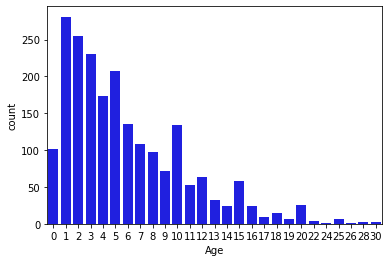

In [ ]:
sns.countplot(Y_origin_AGE['Age'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


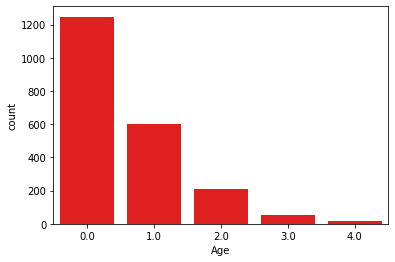

In [ ]:
sns.countplot(Y_transf_AGE['Age'], color='red');

In [ ]:
Y_transf_AGE.sample(5)

,Age
1918,0.0
844,3.0
895,1.0
1540,0.0
566,1.0


#### Quantile

In [ ]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
est.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
Y_origin_AGE = pd.DataFrame(Y, columns=['Age'])
Y_transf_AGE = pd.DataFrame(est.transform(Y).reshape(1,-1)[0], columns=['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


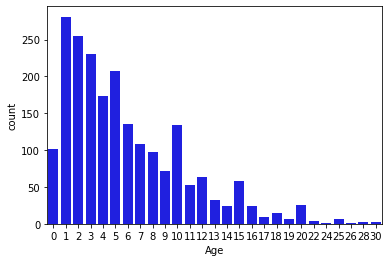

In [ ]:
sns.countplot(Y_origin_AGE['Age'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


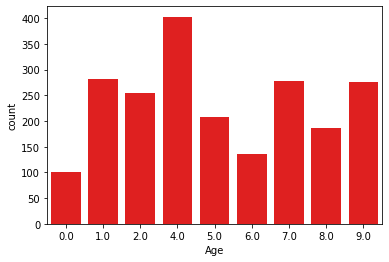

In [ ]:
sns.countplot(Y_transf_AGE['Age'], color='red');

### Discretization Current Salary

#### Uniform

In [ ]:
est1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [ ]:
est1.fit(X)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [ ]:
Y_origin_SALARY = pd.DataFrame(Y, columns=['Current Salary'])
Y_transf_SALARY = pd.DataFrame(est1.transform(Y).reshape(1,-1)[0], columns=['Current Salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


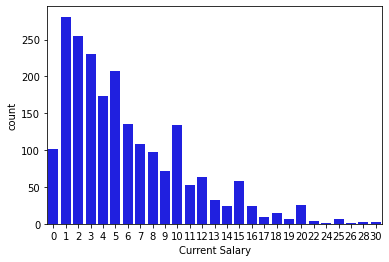

In [ ]:
sns.countplot(Y_origin_SALARY['Current Salary'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


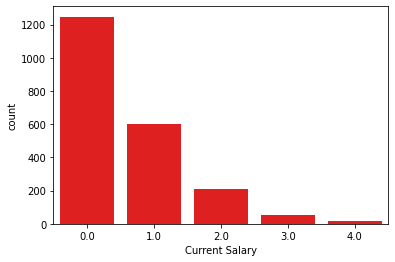

In [ ]:
sns.countplot(Y_transf_SALARY['Current Salary'], color='red');

#### Quantile

In [ ]:
est1 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
est1.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
Y_origin_SALARY = pd.DataFrame(Y, columns=['Current Salary'])
Y_transf_SALARY = pd.DataFrame(est1.transform(Y).reshape(1,-1)[0], columns=['Current Salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


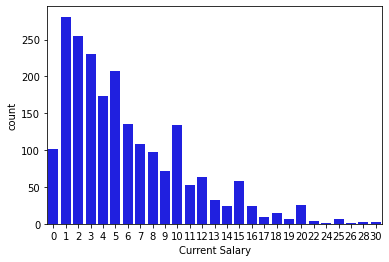

In [ ]:
sns.countplot(Y_origin_SALARY['Current Salary'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


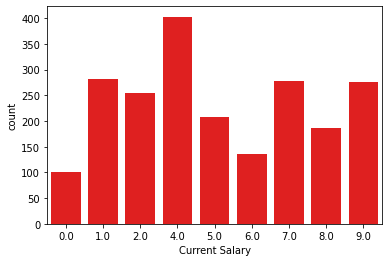

In [ ]:
sns.countplot(Y_transf_SALARY['Current Salary'], color='red');

### Discretization Vacation

#### Uniform

In [ ]:
est2 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [ ]:
est2.fit(X)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [ ]:
Y_origin_VACATION = pd.DataFrame(Y, columns=['Vacation'])
Y_transf_VACATION = pd.DataFrame(est2.transform(Y).reshape(1,-1)[0], columns=['Vacation'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


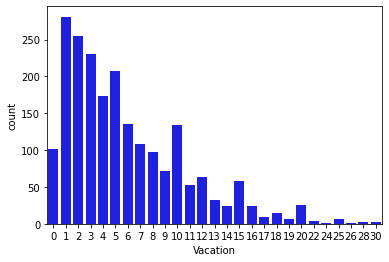

In [ ]:
sns.countplot(Y_origin_VACATION['Vacation'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


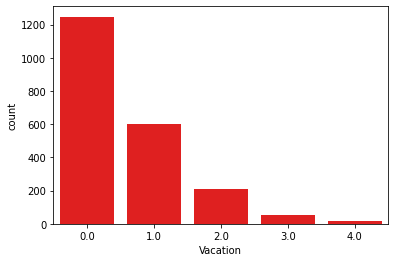

In [ ]:
sns.countplot(Y_transf_VACATION['Vacation'], color='red');

In [ ]:
Y_transf.sample(5)

,Experience
199,1.740281
1891,-0.126088
441,-0.417951
1040,-0.780857
487,0.519706


#### Quantile

In [ ]:
est2 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
est2.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
Y_origin_VACATION = pd.DataFrame(Y, columns=['Vacation'])
Y_transf_VACATION = pd.DataFrame(est2.transform(Y).reshape(1,-1)[0], columns=['Vacation'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


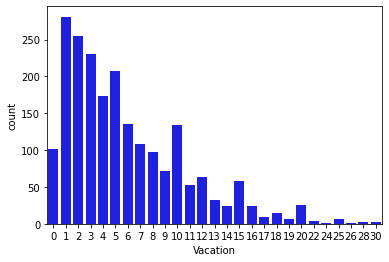

In [ ]:
sns.countplot(Y_origin_VACATION['Vacation'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


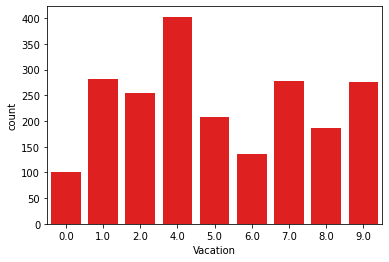

In [ ]:
sns.countplot(Y_transf_VACATION['Vacation'], color='red');

### Discretization Experience

#### Uniform

In [ ]:
est3 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [ ]:
est3.fit(X)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [ ]:
Y_origin_EXP = pd.DataFrame(Y, columns=['Experience'])
Y_transf_EXP = pd.DataFrame(est3.transform(Y).reshape(1,-1)[0], columns=['Experience'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


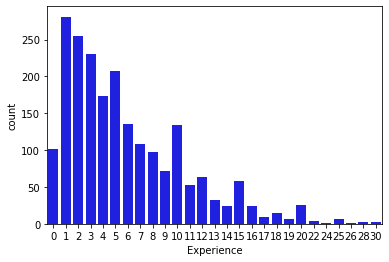

In [ ]:
sns.countplot(Y_origin_EXP['Experience'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


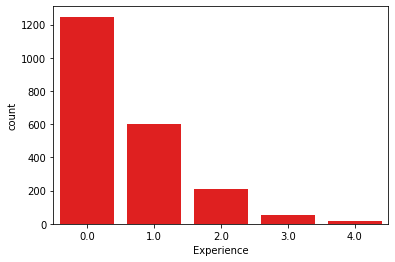

In [ ]:
sns.countplot(Y_transf_EXP['Experience'], color='red');

In [ ]:
Y_transf_EXP.sample(5)

,Experience
1676,0.0
809,2.0
851,1.0
699,1.0
1683,1.0


#### Quantile

In [ ]:
est3 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
est3.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
Y_origin_EXP = pd.DataFrame(Y, columns=['Experience'])
Y_transf_EXP = pd.DataFrame(est2.transform(Y).reshape(1,-1)[0], columns=['Experience'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


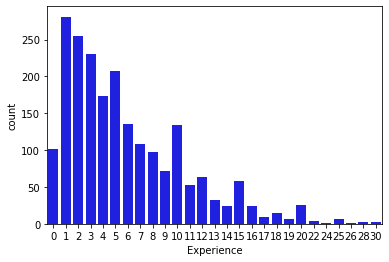

In [ ]:
sns.countplot(Y_origin_EXP['Experience'], color='blue');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


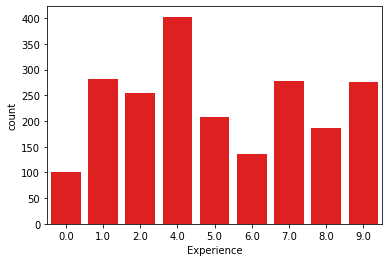

In [ ]:
sns.countplot(Y_transf_EXP['Experience'], color='red');